<h1 style="color:red; font-size:40px; text-align:center; font-weight:bold;">
    CUSTOMER TRANSACTION PREDICTION
</h1>





# <span style="color:red">**PRCP-1003 - CustTransPred**</span>


#### *Team ID: PTID-CDS-JAN-25-2373*


## **Problem Statement**

Task 1

Prepare a complete data analysis report on the given data.

Task 2

Create a predictive model that will help the bank identify which customers will make transactions in the future.

Model Comparison Report

Create a report stating the performance of multiple models on this data and suggest the best model for production



## **Attribute Information**

The dataset is anonymized so we cannot know which feature is what.


There are a total of 200 features in this data set along with ID_code and target columns. 

The target columns contain 0 and 1 value where 0 means the customer will not do a transaction and 1 means the customer will do a transaction.


<h2 style="color:white; font-size:30px;font-weight:bold;">
    Importing Basic Libraries
</h2>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2 style="color:white; font-size:30px;font-weight:bold;">
    Loading Dataset
</h2>


In [ ]:
pd.set_option('display.max_columns',None)
raw = pd.read_csv('/content/drive/MyDrive/Project_datamites/customer_pred.csv')


In [ ]:
raw.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21   var_22  \
0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791   
1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524   
2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145   
3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202   
4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085   
1  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   
2  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025   
3  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398   
4  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   

    var_31  var_32   var_33   var_34   var_35  var_36  var_37   var_38  \
0  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667   
1   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160   
2  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917   
3  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738   
4   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038   

   var_39   var_40   var_41   var_42   var_43   var_44   var_45   var_46  \
0  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226   
1  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   
2  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405   
3  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404   
4  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   

    var_47   var_48   var_49   var_50   var_51  var_52  var_53  var_54  \
0 -14.2136  16.0283   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474   
1   0.1948  34.4014  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946   
2  -5.7864  20.7477   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   
3 -35.1659   0.7613   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913   
4   0.0444  -0.1346  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414   

    var_55   var_56  var_57  var_58   var_59   var_60   var_61  var_62  \
0  14.8322  11.2668  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771   
1  18.5995  19.3219  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944   
2   6.2846  15.6372  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748   
3  12.3972  14.4698  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418   
4  14.1482  16.9840  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952   

   var_63  var_64  var_65  var_66   var_67  var_68  var_69   var_70  var_71  \
0 -0.2154  8.6748  9.5319  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663   
1 -1.3147  8.1042  1.5365  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134   
2  5.8042  3.7163 -1.1016  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520   
3 -4.3923  8.6464  6.3072  5.6221  23.6143  5.0220 -3.9989   4.0462

In [ ]:
data=raw.copy() # Making a copy of raw data for furthere processing

In [ ]:
# Convert float64 to float32 and int64 to int32
data = data.astype({col: "float32" for col in data.select_dtypes("float64").columns} |
                   {col: "int32" for col in data.select_dtypes("int64").columns})

<h2 style="color:white; font-size:30px;font-weight:bold;">
   Basic Checks
</h2>


In [ ]:
data.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

    var_15   var_16   var_17   var_18     var_19     var_20     var_21  \
0  14.5691   5.7487  -7.2393   4.2840  30.713301  10.535000  16.219101   
1  13.7003  13.8275 -15.5849   7.8000  28.570801   3.428700   2.740700   
2  14.6472   7.6782  -1.7395   4.7011  20.477501  17.755899  18.137699   
3  14.8372  10.7430  -0.4299  15.9426  13.725700  20.301001  12.557900   
4  15.0553   8.4871  -3.0680   6.5263  11.315200  21.424601  18.960800   

    var_22  var_23   var_24   var_25   var_26  var_27  var_28  var_29  \
0   2.5791  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965   
1   8.5524  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481   
2   1.2145  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439   
3   6.8202  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407   
4  10.1102  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352   

    var_30   var_31  var_32   var_33   var_34   var_35  var_36  var_37  \
0  -0.3085  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   
1  -9.2987   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434   
2 -11.1025  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346   
3 -15.2398  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   
4  -3.1582   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184   

      var_38  var_39   var_40   var_41   var_42   var_43   var_44     var_45  \
0   4.666700  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418  -7.017000   
1  10.816000  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444 -47.379700   
2  10.891700  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006  -7.907800   
3   9.173800  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485 -24.684000   
4  19.303801  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087 -65.486298   

    var_46     var_47     var_48     var_49   var_50   var_51  var_52  var_53  \
0   5.9226 -14.213600  16.028299   5.325300  12.9194  29.0460 -0.6940  5.1736   
1   7.3718   0.194800  34.401402  25.703699  11.8343  13.2256 -4.1083  6.6885   
2  11.1405  -5.786400  20.747700   6.887400  12.9143  19.5856  0.7268  6.4059   
3  12.7404 -35.165901   0.761300   8.383800  12.6832   9.5503  1.7895  5.2091   
4  13.8657   0.044400  -0.134600  14.426800  13.3273  10.4857 -1.4367  5.7555   

   var_54     var_55     var_56  var_57  var_58   var_59   var_60   var_61  \
0 -0.7474  14.832200  11.266800  5.3822  2.0183  10.1166  16.1828   4.9590   
1 -8.0946  18.599501  19.321899  7.0118  1.9210   8.8682   8.0109  -7.2417   
2  9.3124   6.284600  15.637200  5.8200  1.1000   9.1854  12.5963 -10.3734   
3  8.0913  12.397200  14.469800  6.5850  3.3164   9.4638  15.7820 -25.0222   
4 -8.5414  14.148200  16.983999  6.1812  1.9548   9.2048   8.6591 -27.7439   

   var_62  var_63  var_64  var_65  var_66   var_67  var_68  var_69     var_70  \
0  2.0771 -0.2154  8.6748  9.5319  5.8056  22.4321  5.0109 -4.7010  21.637400   
1  1.7944 -1.3147  8.1042  1.5365  5.4007   7.9344  5.0220  2.2302  40.563202   
2  0.8748  5.8042  3.7163 -1.1016  7.3667   9.8565  5.0228 -5.7828  

In [ ]:
data.tail()

ID_code  target    var_0   var_1    var_2   var_3    var_4  \
199995  train_199995       0  11.4880 -0.4956   8.2622  3.5142  10.3404   
199996  train_199996       0   4.9149 -2.4484  16.7052  6.6345   8.3096   
199997  train_199997       0  11.2232 -5.0518  10.5127  5.6456   9.3410   
199998  train_199998       0   9.7148 -8.6098  13.6104  5.7930  12.5173   
199999  train_199999       0  10.8762 -5.7105  12.1183  8.0328  11.5577   

          var_5   var_6    var_7   var_8   var_9  var_10   var_11   var_12  \
199995  11.6081  5.6709  15.1516 -0.6209  5.6669  3.7574  -9.5348  13.9860   
199996 -10.5628  5.8802  21.5940 -3.6797  6.0019  6.5576 -11.8776  14.4131   
199997  -5.4086  4.5555  21.5571  0.1202  6.1629  4.4004  -0.4651  13.8775   
199998   0.5339  6.0479  17.0152 -2.1926  8.7542  1.4245   0.7086  14.2110   
199999   0.3488  5.2839  15.2058 -0.4541  9.3688 -7.3826  -8.7049  14.2486   

         var_13   var_14   var_15   var_16   var_17     var_18     var_19  \
199995   5.2982   8.2705  14.1527   7.4540  -5.0105  12.046500   8.634900   
199996   3.3087   3.5800  14.1597   7.5191  -8.8715  17.946699  17.023701   
199997   9.7414  10.9044  14.5597   9.6214  -1.6429  23.112700  12.151700   
199998   6.5641   7.6177  13.8771   9.0479 -11.8164  14.083100  -2.034500   
199999  15.0849   5.2313  14.3572  12.5523  -6.5066  11.359200  11.477900   

           var_20     var_21  var_22  var_23   var_24   var_25  var_26  \
199995   9.913700  25.137600  1.0914  3.2326   7.7802  13.9939  2.9085   
199996   6.645900  18.234501  0.8982  2.2532  15.4977  13.3282  5.2281   
199997  16.257700   3.145300  3.1008  2.1497  10.2715  13.5637  4.9473   
199998  18.386299   3.091100  5.5803  3.7091  12.8219  13.8866 -3.3859   
199999  15.499700   3.847400  2.4381  2.8295  10.6681  13.7167 -7.7771   

        var_27  var_28  var_29   var_30   var_31  var_32   var_33   var_34  \
199995  0.1005  4.2369  7.5665  -9.2149   9.5746  1.4012   7.4211  11.0075   
199996 -3.7424  5.5144  5.7148 -13.7470   7.4369  1.3041  12.7552  12.5362   
199997 -0.9905  6.2801  9.4902 -12.8549  11.0403  1.4306  13.8533  11.7484   
199998 -0.4440  5.4817  4.0902  -7.7085  10.3952  2.5739  17.8529  11.3433   
199999 -2.7798  6.2885  6.0089   2.1547  10.8181 -0.2712  12.5254  11.6304   

        var_35  var_36  var_37   var_38  var_39   var_40   var_41   var_42  \
199995  7.8080  4.5567  4.9861   9.7471  0.0722   5.9053   8.1743  10.8800   
199996 -1.1002  2.4370  6.2631  14.8565 -2.9862  -7.8820   7.1320  11.8869   
199997  6.8969  6.4162  3.4246  12.1170  3.4096  -8.8763   9.5230  11.2566   
199998  5.0534 -3.0055  3.9433  11.0759  1.2173 -11.7669  11.8626  10.7766   
199999 -1.4949  7.9509  2.2480   8.1459  0.7928  -7.9028   7.4223  11.4249   

         var_43   var_44     var_45   var_46     var_47     var_48   var_49  \
199995  11.1665   4.2600  -2.129600   8.7833 -15.572700  -8.491600  22.1905   
199996  11.4218   8.9282 -27.200701  14.5962 -19.850201  26.077499  24.3915   
199997  11.4025  11.8492 -49.500702   7.4376 -21.294600  16.570101  15.9192   
199998  11.6900  12.9929 -42.970402  12.7881   4.404400  27.087999  14.0471   
199999  11.9103   8.7002  -6.688300  10.5219 -25.993299  11.624100  13.4670   

         var_50     var_51   var_52  var_53   var_54     var_55     var_56  \
199995  12.4110  15.116800   1.6041  6.1868  10.9576  18.737101  15.298600   
199996  12.6910  10.245300   6.8173  4.5666  -9.5685  18.468500  16.953400   
199997  11.4688  16.379999  -5.7152  6.0771   7.5194   9.636400  15.316600   
199998  13.4318   9.432500   1.0213  6.2404  -8.1836   4.105700  10.794100   
199999  12.3563   3.403100 -12.9247  6.2607  11.8525   8.858100  20.643801   

        var_57  var_58   var_59     var_60     var_61  var_62  var_63  var_64  \
199995  5.7322  5.1244   9.8225  14.031500 -23.606400 -1.3403 -2.5577  6.3582   
199996  7.3660  4.7038   9.4559   6.003700 -10.872800  0.7859  4.7000  7.8077   
199997  5.4830  0.6006   9.5466  22.096001  -6.781300  3.687

In [ ]:
data.shape

(200000, 202)

### Insights
There are 200000 rows and 202 columns

### Insights

In [ ]:
data.info(verbose=True) #Verbose-Forces detailed info, including all columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 202 columns):
 #    Column   Dtype  
---   ------   -----  
 0    ID_code  object 
 1    target   int32  
 2    var_0    float32
 3    var_1    float32
 4    var_2    float32
 5    var_3    float32
 6    var_4    float32
 7    var_5    float32
 8    var_6    float32
 9    var_7    float32
 10   var_8    float32
 11   var_9    float32
 12   var_10   float32
 13   var_11   float32
 14   var_12   float32
 15   var_13   float32
 16   var_14   float32
 17   var_15   float32
 18   var_16   float32
 19   var_17   float32
 20   var_18   float32
 21   var_19   float32
 22   var_20   float32
 23   var_21   float32
 24   var_22   float32
 25   var_23   float32
 26   var_24   float32
 27   var_25   float32
 28   var_26   float32
 29   var_27   float32
 30   var_28   float32
 31   var_29   float32
 32   var_30   float32
 33   var_31   float32
 34   var_32   float32
 35   var_33   float32
 36   var_34  

In [ ]:
numerical_vars = data.select_dtypes(include=['number']).columns.tolist()
#columns.tolist(): Converts the column names to a list
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97'

In [ ]:
missing_data =  data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
#to_frame() → Converts the result into a DataFrame
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len( data))*100,2)
pd.set_option("display.max_rows", None)
missing_data

Total No. of Missing Values  % of Missing Values
ID_code                            0                  0.0
target                             0                  0.0
var_0                              0                  0.0
var_1                              0                  0.0
var_2                              0                  0.0
var_3                              0                  0.0
var_4                              0                  0.0
var_5                              0                  0.0
var_6                              0                  0.0
var_7                              0                  0.0
var_8                              0                  0.0
var_9                              0                  0.0
var_10                             0                  0.0
var_11                             0                  0.0
var_12                             0                  0.0
var_13                             0                  0.0
var_14                             0                  0.0
var_15                             0                  0.0
var_16                             0                  0.0
var_17                             0                  0.0
var_18                             0                  0.0
var_19                             0                  0.0
var_20                             0                  0.0
var_21                             0                  0.0
var_22                             0                  0.0
var_23                             0                  0.0
var_24                             0                  0.0
var_25                             0                  0.0
var_26                             0                  0.0
var_27                             0                  0.0
var_28                             0                  0.0
var_29                             0                  0.0
var_30                             0                  0.0
var_31                             0                  0.0
var_32                             0                  0.0
var_33                             0                  0.0
var_34                             0                  0.0
var_35                             0                  0.0
var_36                             0                  0.0
var_37                             0                  0.0
var_38                             0                  0.0
var_39                             0                  0.0
var_40                             0                  0.0
var_41                             0                  0.0
var_42                             0                  0.0
var_43                             0                  0.0
var_44                             0                  0.0
var_45                             0                  0.0
var_46                             0                  0.0
var_47                             0                  0.0
var_48                             0                  0.0
var_49                             0                  0.0
var_50                             0                  0.0
var_51                             0                  0.0
var_52                             0                  0.0
var_53                             0                  0.0
var_54                             0                  0.0
var_55                             0                  0.0
var_56                             0                  0.0
var_57                             0                  0.0
var_58                             0                  0.0
var_59                             0                  0.0
var_60                             0                  0.0
var_61                             0                  0.0
var_62                             0                  0.0
var_63                             0                  0.0
var_64                             0                  0.0
var_65                             0                  0.0
var_66 

## Checking Null values

In [ ]:
null_values=data.isna().sum()
null_values[null_values>0]

Series([], dtype: int64)

### Insights
There are no NULL VALUES in this dataset

In [ ]:
data.dtypes.value_counts()

float32    200
object       1
int32        1
Name: count, dtype: int64

### Insights
There are 200 columns that are in float32

There are 1 column that are in int32

ID_code is object datatype

Target is int datatype

All other columns are float

# Checking Duplicates

In [ ]:
duplicates = data[data.duplicated()]
duplicates

Empty DataFrame
Columns: [ID_code, target, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, var_10, var_11, var_12, var_13, var_14, var_15, var_16, var_17, var_18, var_19, var_20, var_21, var_22, var_23, var_24, var_25, var_26, var_27, var_28, var_29, var_30, var_31, var_32, var_33, var_34, var_35, var_36, var_37, var_38, var_39, var_40, var_41, var_42, var_43, var_44, var_45, var_46, var_47, var_48, var_49, var_50, var_51, var_52, var_53, var_54, var_55, var_56, var_57, var_58, var_59, var_60, var_61, var_62, var_63, var_64, var_65, var_66, var_67, var_68, var_69, var_70, var_71, var_72, var_73, var_74, var_75, var_76, var_77, var_78, var_79, var_80, var_81, var_82, var_83, var_84, var_85, var_86, var_87, var_88, var_89, var_90, var_91, var_92, var_93, var_94, var_95, var_96, var_97, ...]
Index: []

### Insights
There are NO DUPLICATES value in this dataset

<h2 style="color:white; font-size:30px;font-weight:bold;">
   Statistical Analysis
</h2>


data.describe() → Generates descriptive statistics for numerical columns in the dataset

In [ ]:
pd.set_option('display.max_rows',None)
data.describe().T.round(2)

count   mean    std    min    25%    50%    75%    max
target   200000.0   0.10   0.30   0.00   0.00   0.00   0.00   1.00
var_0    200000.0  10.68   3.04   0.41   8.45  10.52  12.76  20.32
var_1    200000.0  -1.63   4.05 -15.04  -4.74  -1.61   1.36  10.38
var_2    200000.0  10.72   2.64   2.12   8.72  10.58  12.52  19.35
var_3    200000.0   6.80   2.04  -0.04   5.25   6.82   8.32  13.19
var_4    200000.0  11.08   1.62   5.07   9.88  11.11  12.26  16.67
var_5    200000.0  -5.07   7.86 -32.56 -11.20  -4.83   0.92  17.25
var_6    200000.0   5.41   0.87   2.35   4.77   5.39   6.00   8.45
var_7    200000.0  16.55   3.42   5.35  13.94  16.46  19.10  27.69
var_8    200000.0   0.28   3.33 -10.51  -2.32   0.39   2.94  10.15
var_9    200000.0   7.57   1.24   3.97   6.62   7.63   8.58  11.15
var_10   200000.0   0.39   5.50 -20.73  -3.59   0.49   4.38  18.67
var_11   200000.0  -3.25   5.97 -26.09  -7.51  -3.29   0.85  17.19
var_12   200000.0  14.02   0.19  13.43  13.89  14.03  14.16  14.65
var_13   200000.0   8.53   4.64  -6.01   5.07   8.60  12.27  22.33
var_14   200000.0   7.54   2.25   1.01   5.78   7.52   9.27  14.94
var_15   200000.0  14.57   0.41  13.08  14.26  14.57  14.87  15.86
var_16   200000.0   9.33   2.56   0.64   7.45   9.23  11.06  17.95
var_17   200000.0  -5.70   6.71 -33.38 -10.48  -5.67  -0.81  19.03
var_18   200000.0  15.24   7.85 -10.66   9.18  15.20  21.01  41.75
var_19   200000.0  12.44   8.00 -12.40   6.28  12.45  18.43  35.18
var_20   200000.0  13.29   5.88  -5.43   8.63  13.20  17.88  31.29
var_21   200000.0  17.26   8.20 -10.09  11.55  17.23  23.09  49.04
var_22   200000.0   4.31   2.85  -5.32   2.18   4.28   6.29  14.59
var_23   200000.0   3.02   0.53   1.21   2.63   3.01   3.40   4.88
var_24   200000.0  10.58   3.78  -0.68   7.61  10.38  13.48  25.45
var_25   200000.0  13.67   0.29  12.72  13.46  13.66  13.86  14.65
var_26   200000.0  -4.06   5.92 -24.24  -8.32  -4.20  -0.09  15.68
var_27   200000.0  -1.14   1.52  -6.17  -2.31  -1.13   0.02   3.24
var_28   200000.0   5.53   0.78   2.09   4.99   5.53   6.09   8.79
var_29   200000.0   5.05   2.62  -4.79   3.17   4.95   6.80  13.14
var_30   200000.0  -7.69   7.97 -34.80 -13.77  -7.41  -1.44  15.65
var_31   200000.0  10.39   2.16   2.14   8.87  10.37  11.89  20.17
var_32   200000.0  -0.51   2.59  -8.99  -2.50  -0.50   1.47   6.79
var_33   200000.0  14.77   4.32   1.51  11.46  14.58  18.10  29.55
var_34   200000.0  11.43   0.54   9.82  11.03  11.44  11.84  13.29
var_35   200000.0   3.84   5.18 -16.51   0.12   3.92   7.49  21.53
var_36   200000.0   2.19   3.12  -8.10  -0.01   2.20   4.46  14.25
var_37   200000.0   5.87   2.25  -1.18   4.13   5.90   7.54  11.86
var_38   200000.0  10.64   4.28  -6.34   7.59  10.56  13.60  29.82
var_39   200000.0   0.66   4.07 -14.55  -2.20   0.67   3.64  15.32
var_40   200000.0  -6.73   8.28 -35.21 -12.83  -6.62  -0.88  18.11
var_41   200000.0   9.30   5.94  -8.54   4.52   9.16  13.75  26.17
var_42   200000.0  11.22   0.70   8.86  10.71  11.24  11.76  13.47
var_43   200000.0  11.57   0.31  10.65  11.34  11.56  11.80  12.58
var_44   200000.0   8.95   5.90  -9.94   5.31   9.44  13.09  34.20
var_45   200000.0 -12.70  21.40 -90.25 -28.73 -12.55   3.15  62.08
var_46   200000.0  11.33   2.86   1.21   9.25  11.31  13.32  21.29
var_47   200000.0 -12.47  10.58 -47.69 -20.65 -12.48  -4.24  20.69
var_48   200000.0  14.70  11.38 -23.90   6.35  14.56  23.03  54.27
var_49   200000.0  16.68   7.86  -8.07  10.65  16.67  22.55  41.15
var_50   200000.0  12.74   0.69  10.39  12.27  12.75  13.23  15.32
var_51   200000.0  13.43   8.19 -15.05   7.27  13.44  19.39  40.69
var_52   200000.0  -2.53   4.99 -24.72  -6.07  -2.50   0.94  17.10
var_53   200000.0   6.01   0.76   3.34   5.44   6.03   6.54   8.23
var_54   200000.0   1.14   8.41 -26.78  -5.15   1.27   7.40  28.57
var_55   200000.0  12.75   5.69  -3.78   8.16  12.59  17.09  29.09
var_56   200000.0  16.63   3.54   2.76  14.10  16.65  19.29  29.07
var_57   200000.0   6.27   0.80   3.44   5.69   6.26   6.84

In [ ]:
data.describe(include='object').round(2).T

count  unique      top freq
ID_code  200000  200000  train_0    1

<h2 style="color:white; font-size:30px;font-weight:bold;">
   Explainatory Data Analysis
</h2>



# Clearing outliers and imputing it with median

In [ ]:
def impute_outliers_with_median(data):
    """
    Identifies outliers using the IQR method and imputes them with the column mean.

    Parameters:
    data (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: DataFrame with outliers replaced by column means.
    int: Total number of outliers imputed.
    float: Total percentage of outliers in the dataset.
    """
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=['float32'])

    # Calculate Q1, Q3, and IQR
    Q1 = numeric_data.quantile(0.25)
    Q3 = numeric_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Make a copy of the data to modify
    data_imputed = data.copy()

    # Count total outliers
    total_outliers = 0

    # Loop through each numeric column and impute outliers
    for column in numeric_data.columns:
        outliers = (data_imputed[column] < lower_bound[column]) | (data_imputed[column] > upper_bound[column])
        num_outliers = outliers.sum()
        total_outliers += num_outliers

        # Impute outliers with column mean
        median_value = numeric_data[column].median()
        data_imputed.loc[outliers, column] = median_value

    # Calculate total percentage of outliers
    total_values = numeric_data.size
    outlier_percentage = (total_outliers / total_values) * 100

    print(f"Total Number of Outliers Imputed: {total_outliers}")
    print(f"Total Percentage of Outliers: {outlier_percentage:.2f}%")

    return data_imputed, total_outliers, outlier_percentage

# Impute outliers using the mean
data_imputed, total_outliers, outlier_percentage = impute_outliers_with_median(data)

print("Number of outliers imputed:", total_outliers)
print(f"Percentage of outliers in the dataset: {outlier_percentage:.2f}%")



Total Number of Outliers Imputed: 26536
Total Percentage of Outliers: 0.07%
Number of outliers imputed: 26536
Percentage of outliers in the dataset: 0.07%


In [ ]:
data_imputed.head(20)

ID_code  target    var_0   var_1      var_2   var_3    var_4      var_5  \
0    train_0       0   8.9255 -6.7863  11.908100  5.0930  11.4607  -9.283400   
1    train_1       0  11.5006 -4.1473  13.858800  5.3890  12.3622   7.043300   
2    train_2       0   8.6093 -2.7457  12.080500  7.8928  10.5825  -9.083700   
3    train_3       0  11.0604 -2.1518   8.952200  7.1957  12.5846  -1.836100   
4    train_4       0   9.8369 -1.4834  12.874600  6.6375  12.2772   2.448600   
5    train_5       0  11.4763 -2.3182  12.608000  8.6264  10.9621   3.560900   
6    train_6       0  11.8091 -0.0832   9.349400  4.2916  11.1355  -8.019800   
7    train_7       0  13.5580 -7.9881  13.877600  7.5985   8.6543   0.831000   
8    train_8       0  16.1071  2.4426  13.930700  5.6327   8.8014   6.163000   
9    train_9       0  12.5088  1.9743   8.896000  5.4508  13.6043 -16.285900   
10  train_10       0   5.0702 -0.5447   9.590000  4.2987  12.3910 -18.868700   
11  train_11       0  12.7188 -7.9750  10.375700  9.0101  12.8570 -12.085200   
12  train_12       0   8.7671 -4.6154   9.724200  7.4242   9.0254   1.424700   
13  train_13       1  16.3699  1.5934  16.739500  7.3330  12.1450   5.900400   
14  train_14       0  13.8080  5.0514  17.261101  8.5120  12.8517  -9.162200   
15  train_15       0   3.9416  2.6562  13.363300  6.8895  12.2806 -16.162001   
16  train_16       0   5.0615  0.2689  15.132500  3.6587  13.5276  -6.547700   
17  train_17       0   8.4199 -1.8128   8.120200  5.3955   9.7184 -17.839001   
18  train_18       0   4.8750  1.2646  11.919000  8.4650  10.7203  -0.670700   
19  train_19       0   4.4090 -0.7863  15.182800  8.0631  11.2831  -0.735600   

     var_6      var_7   var_8   var_9  var_10   var_11   var_12   var_13  \
0   5.1187  18.626600 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745   
1   5.6208  16.533800  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135   
2   6.9427  14.615500 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124   
3   5.8428  14.925000 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704   
4   5.9405  19.251400  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895   
5   4.5322  15.225500  3.5855  5.9790  0.8010  -0.6192  13.6380   1.2589   
6   6.1961  12.077100 -4.3781  7.9232 -5.1288  -7.5271  14.1629  13.3058   
7   5.6890  22.326200  5.0647  7.1971  1.4532  -6.7033  14.2919  10.9699   
8   4.4514  10.185400 -3.1882  9.0827  0.9501   1.7982  14.0654  -3.0572   
9   6.0637  16.841000  0.1287  7.9682  0.8787   3.0537  13.9639   0.8071   
10  6.0382  14.379700 -0.4711  7.3198  4.6603 -14.0548  13.9059   9.0796   
11  5.6464  11.837000  1.2953  6.8093 -6.1501  -5.4925  13.6713   9.5331   
12  6.2815  12.314300  5.6964  6.0197  5.2524  -4.5162  14.1985   9.6978   
13  4.8222  20.972900  1.1064  8.6978  2.3287 -11.3409  13.7999   2.7925   
14  5.7327  21.051701 -4.5117  6.8116  8.2028  -7.8221  13.9241  10.3896   
15  5.6979  14.457300 -4.3144  7.1290 -7.0984   1.7324  14.1446   5.2403   
16  5.2757   9.871000  2.5569  9.4701 -7.4401  -7.2719  14.1209  13.1612   
17  4.0959  15.286000  1.9016  7.0967 -9.0265 -13.1314  13.9721   9.7421   
18  5.6103  16.466101 -2.6601  8.4254  0.8679  -7.0238  13.9686  12.5741   
19  6.3801  16.021799  2.4621  8.2108 -1.7085 -15.0385  14.3029   6.4895   

     var_14   var_15   var_16   var_17     var_18     var_19     var_20  \
0    8.7989  14.5691   5.7487  -7.2393   4.284000  30.713301  10.535000   
1    5.4345  13.7003  13.8275 -15.5849   7.800000  28.570801   3.428700   
2    7.5244  14.6472   7.6782  -1.7395   4.701100  20.477501  17.755899   
3    6.4569  14.8372  10.7430  -0.4299  15.942600  13.725700  20.301001   
4    7.7894  15.0553   8.4871  -3.0680   6.526300  11.315200  21.424601   
5    8.1939  14.9894  12.0763  -1.4710   6.734100  14.824100  19.717199   
6    7.8412  14.3363   7.5951  11.0922  21.197599   6.294600  15.887700   
7    6.9190  14.2459   9.5376  -0.7226   5.154800  17.153500  13.732600   
8   11.1642  14.8757  10.0075  -8.9472   3.834900   

# Graph of Boxplots Before and After Imputation

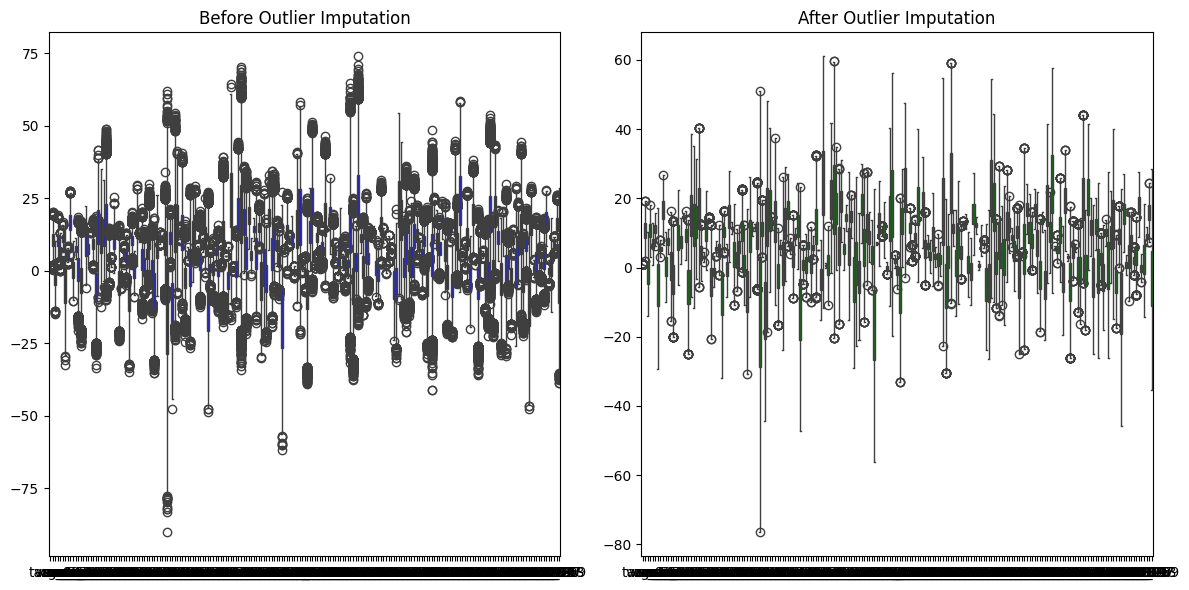

In [ ]:
# Function to plot boxplots before and after imputation
def plot_boxplots_before_after(train_before, train_after):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


    sns.boxplot(data=train_before, ax=axes[0], color='blue')
    axes[0].set_title('Before Outlier Imputation')


    sns.boxplot(data=train_after, ax=axes[1], color='green')
    axes[1].set_title('After Outlier Imputation')

    plt.tight_layout()
    plt.show()

# Plot boxplots before and after imputation
plot_boxplots_before_after(data, data_imputed)


In [ ]:
data = data_imputed
data.head()


ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

    var_15   var_16   var_17   var_18     var_19     var_20     var_21  \
0  14.5691   5.7487  -7.2393   4.2840  30.713301  10.535000  16.219101   
1  13.7003  13.8275 -15.5849   7.8000  28.570801   3.428700   2.740700   
2  14.6472   7.6782  -1.7395   4.7011  20.477501  17.755899  18.137699   
3  14.8372  10.7430  -0.4299  15.9426  13.725700  20.301001  12.557900   
4  15.0553   8.4871  -3.0680   6.5263  11.315200  21.424601  18.960800   

    var_22  var_23   var_24   var_25   var_26  var_27  var_28  var_29  \
0   2.5791  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965   
1   8.5524  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481   
2   1.2145  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439   
3   6.8202  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407   
4  10.1102  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352   

    var_30   var_31  var_32   var_33   var_34   var_35  var_36  var_37  \
0  -0.3085  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   
1  -9.2987   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434   
2 -11.1025  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346   
3 -15.2398  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   
4  -3.1582   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184   

      var_38  var_39   var_40   var_41   var_42   var_43   var_44     var_45  \
0   4.666700  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418  -7.017000   
1  10.816000  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444 -47.379700   
2  10.891700  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006  -7.907800   
3   9.173800  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485 -24.684000   
4  19.303801  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087 -65.486298   

    var_46     var_47     var_48     var_49   var_50   var_51  var_52  var_53  \
0   5.9226 -14.213600  16.028299   5.325300  12.9194  29.0460 -0.6940  5.1736   
1   7.3718   0.194800  34.401402  25.703699  11.8343  13.2256 -4.1083  6.6885   
2  11.1405  -5.786400  20.747700   6.887400  12.9143  19.5856  0.7268  6.4059   
3  12.7404 -35.165901   0.761300   8.383800  12.6832   9.5503  1.7895  5.2091   
4  13.8657   0.044400  -0.134600  14.426800  13.3273  10.4857 -1.4367  5.7555   

   var_54     var_55     var_56  var_57  var_58   var_59   var_60   var_61  \
0 -0.7474  14.832200  11.266800  5.3822  2.0183  10.1166  16.1828   4.9590   
1 -8.0946  18.599501  19.321899  7.0118  1.9210   8.8682   8.0109  -7.2417   
2  9.3124   6.284600  15.637200  5.8200  1.1000   9.1854  12.5963 -10.3734   
3  8.0913  12.397200  14.469800  6.5850  3.3164   9.4638  15.7820 -25.0222   
4 -8.5414  14.148200  16.983999  6.1812  1.9548   9.2048   8.6591 -27.7439   

   var_62  var_63  var_64  var_65  var_66   var_67  var_68  var_69     var_70  \
0  2.0771 -0.2154  8.6748  9.5319  5.8056  22.4321  5.0109 -4.7010  21.637400   
1  1.7944 -1.3147  8.1042  1.5365  5.4007   7.9344  5.0220  2.2302  40.563202   
2  0.8748  5.8042  3.7163 -1.1016  7.3667   9.8565  5.0228 -5.7828  

In [ ]:
data.target.value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

### insights
Target is highly imbalanced

We have to balance it

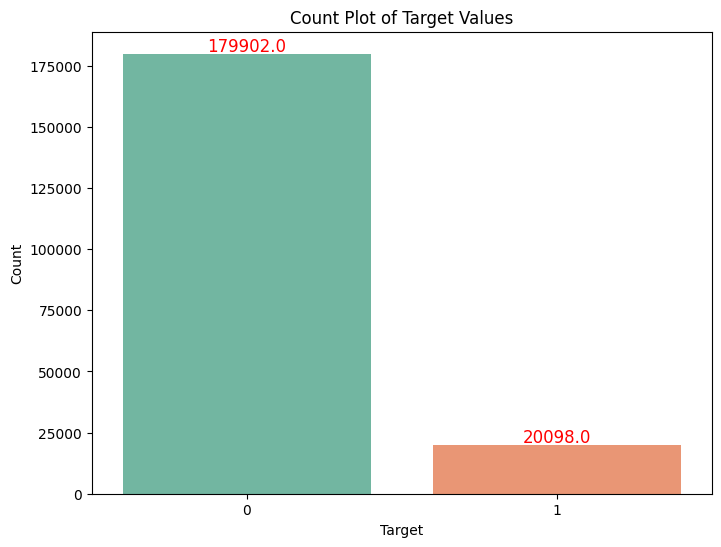

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=data, palette='Set2')

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='red',
                xytext=(0, 5), textcoords='offset points')


plt.title('Count Plot of Target Values')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [ ]:
num_0, num_1 = np.bincount(data['target'])
print(f'Number of samples belonging to class zero: {num_0} ({num_0 / data.shape[0]:0.2%} of total)')
print(f'Number of samples belonging to class one: {num_1} ({num_1 / data.shape[0]:0.2%} of total)')

Number of samples belonging to class zero: 179902 (89.95% of total)
Number of samples belonging to class one: 20098 (10.05% of total)


# Checking the Distribution of the features

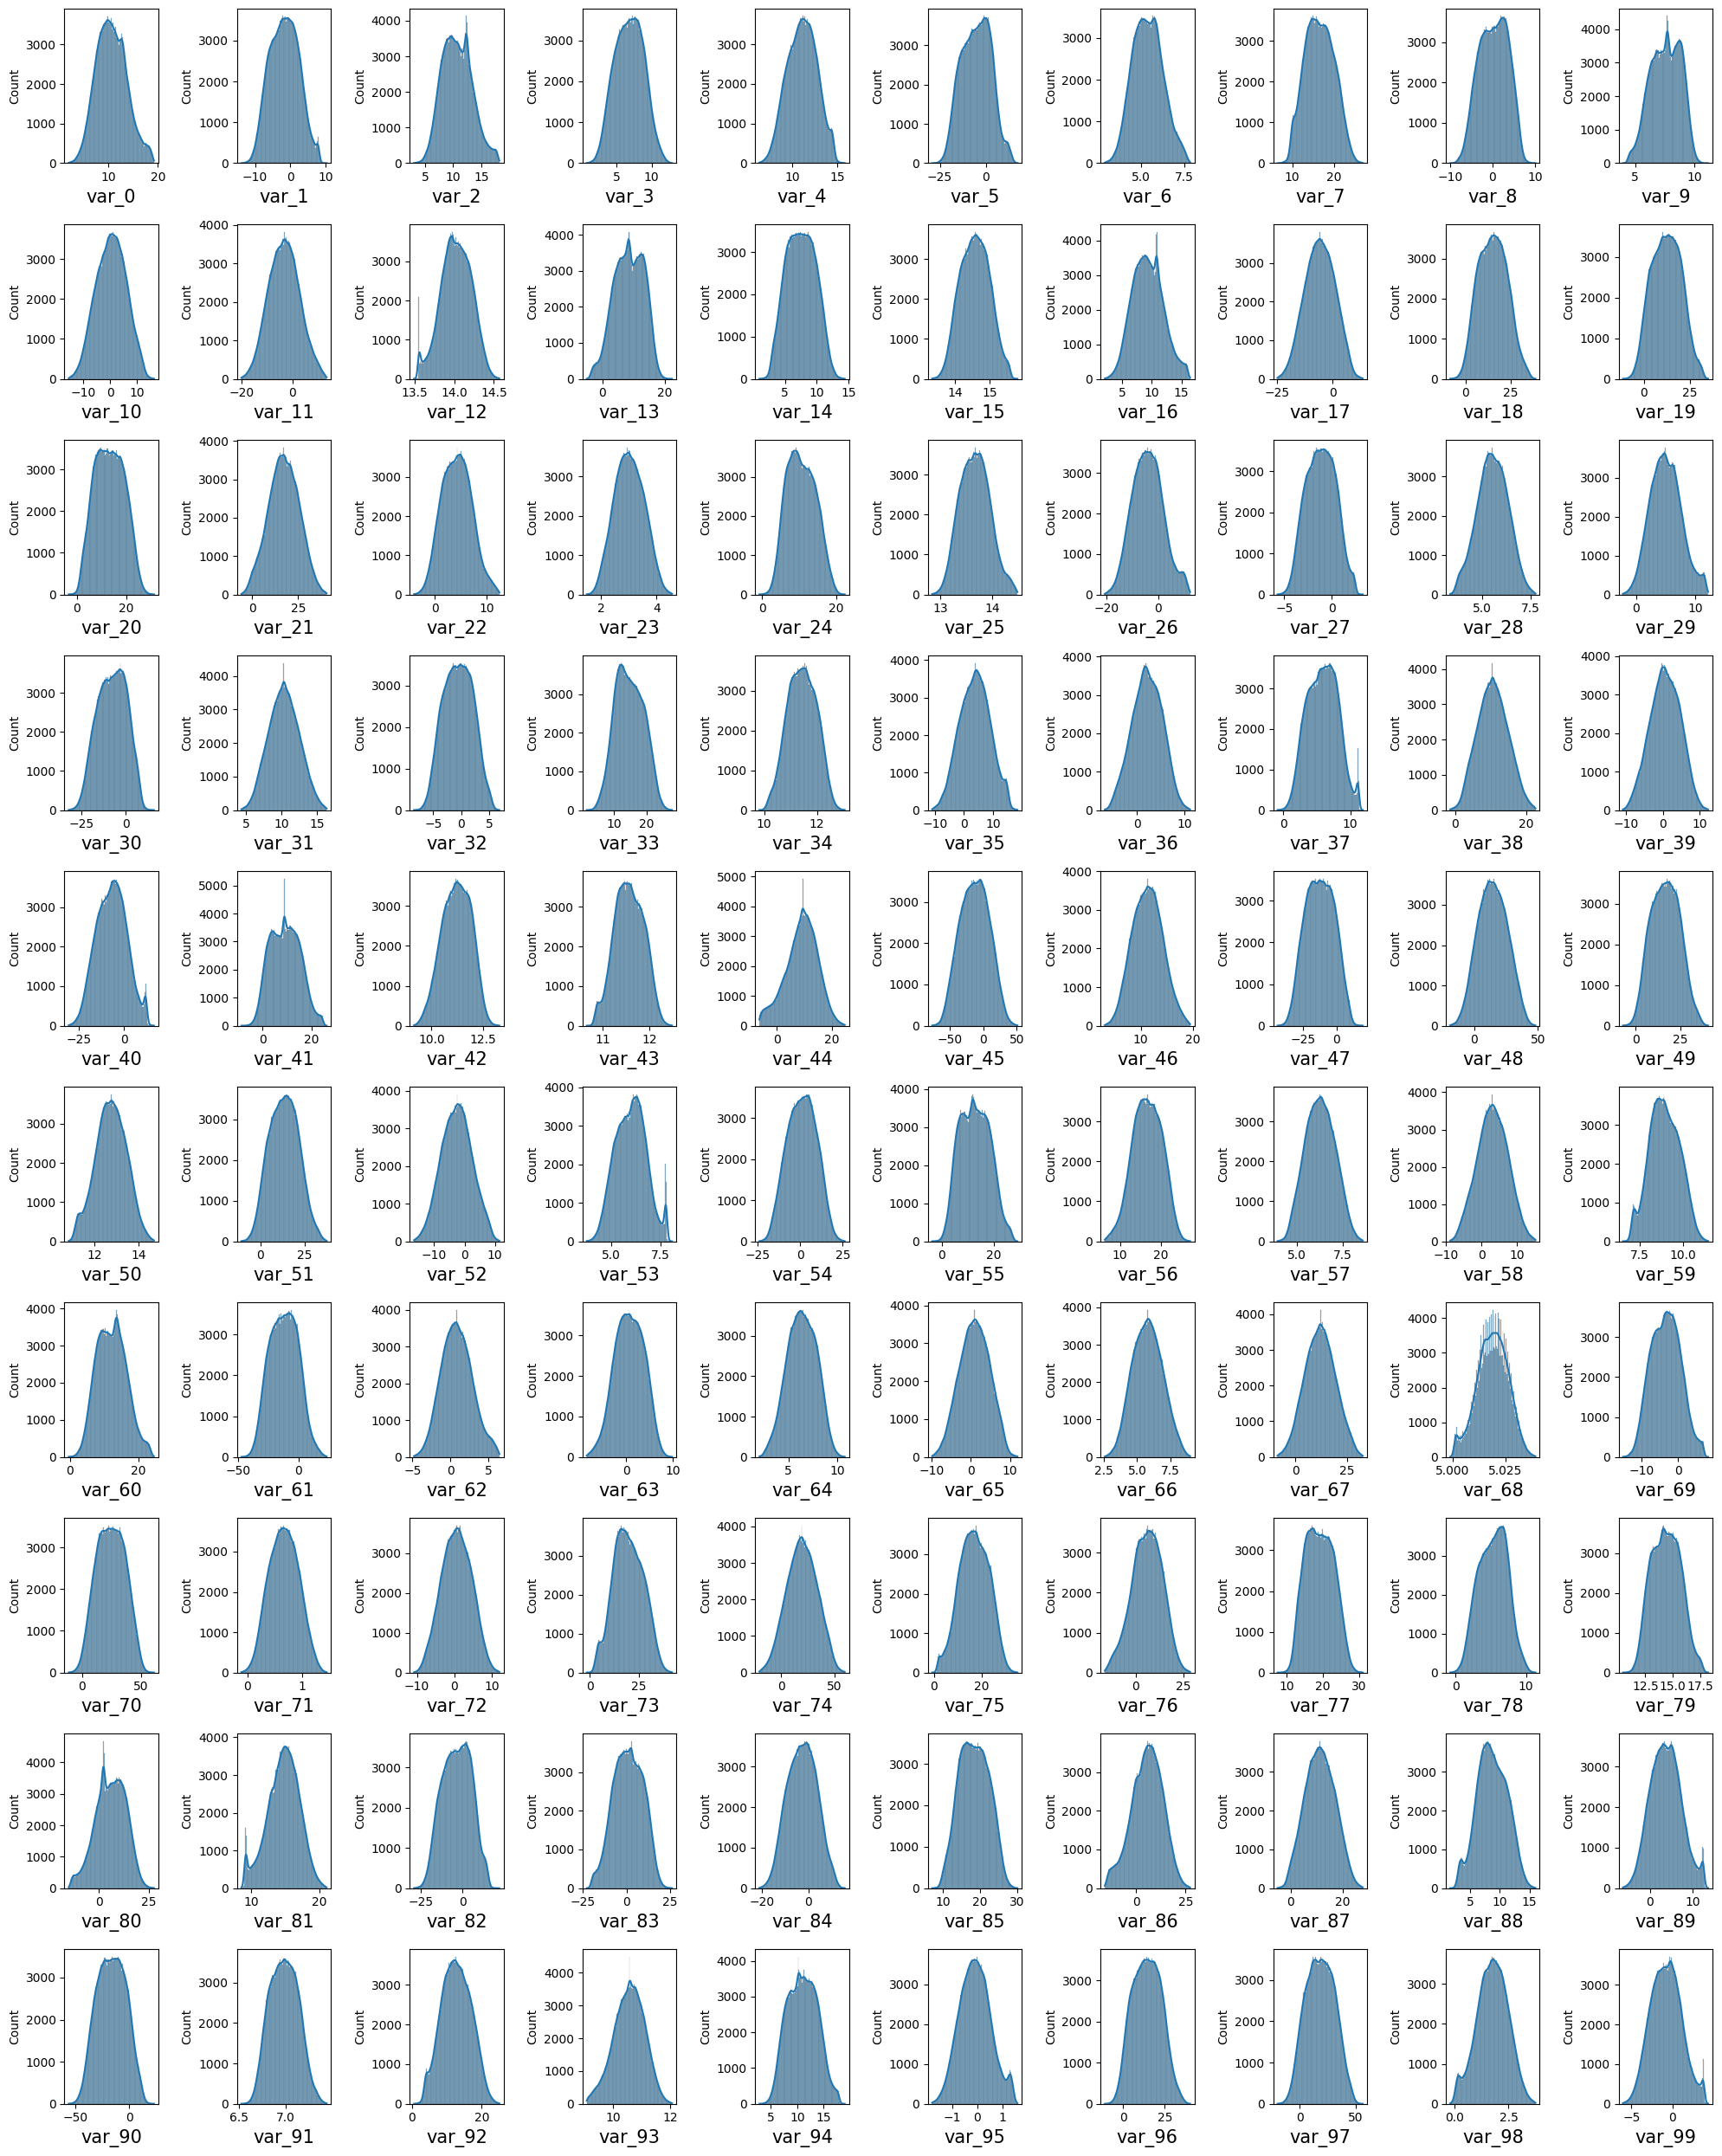

In [ ]:
dist = data.iloc[:,2:102]
plt.figure(figsize=(20,25),facecolor='white')
plotno = 1
for column in dist:
    if plotno<=100:
        plt.subplot(10,10,plotno)
        sns.histplot(dist[column],kde=True)
        plt.xlabel(column,fontsize=15)
    plotno+=1
plt.tight_layout()
plt.show()

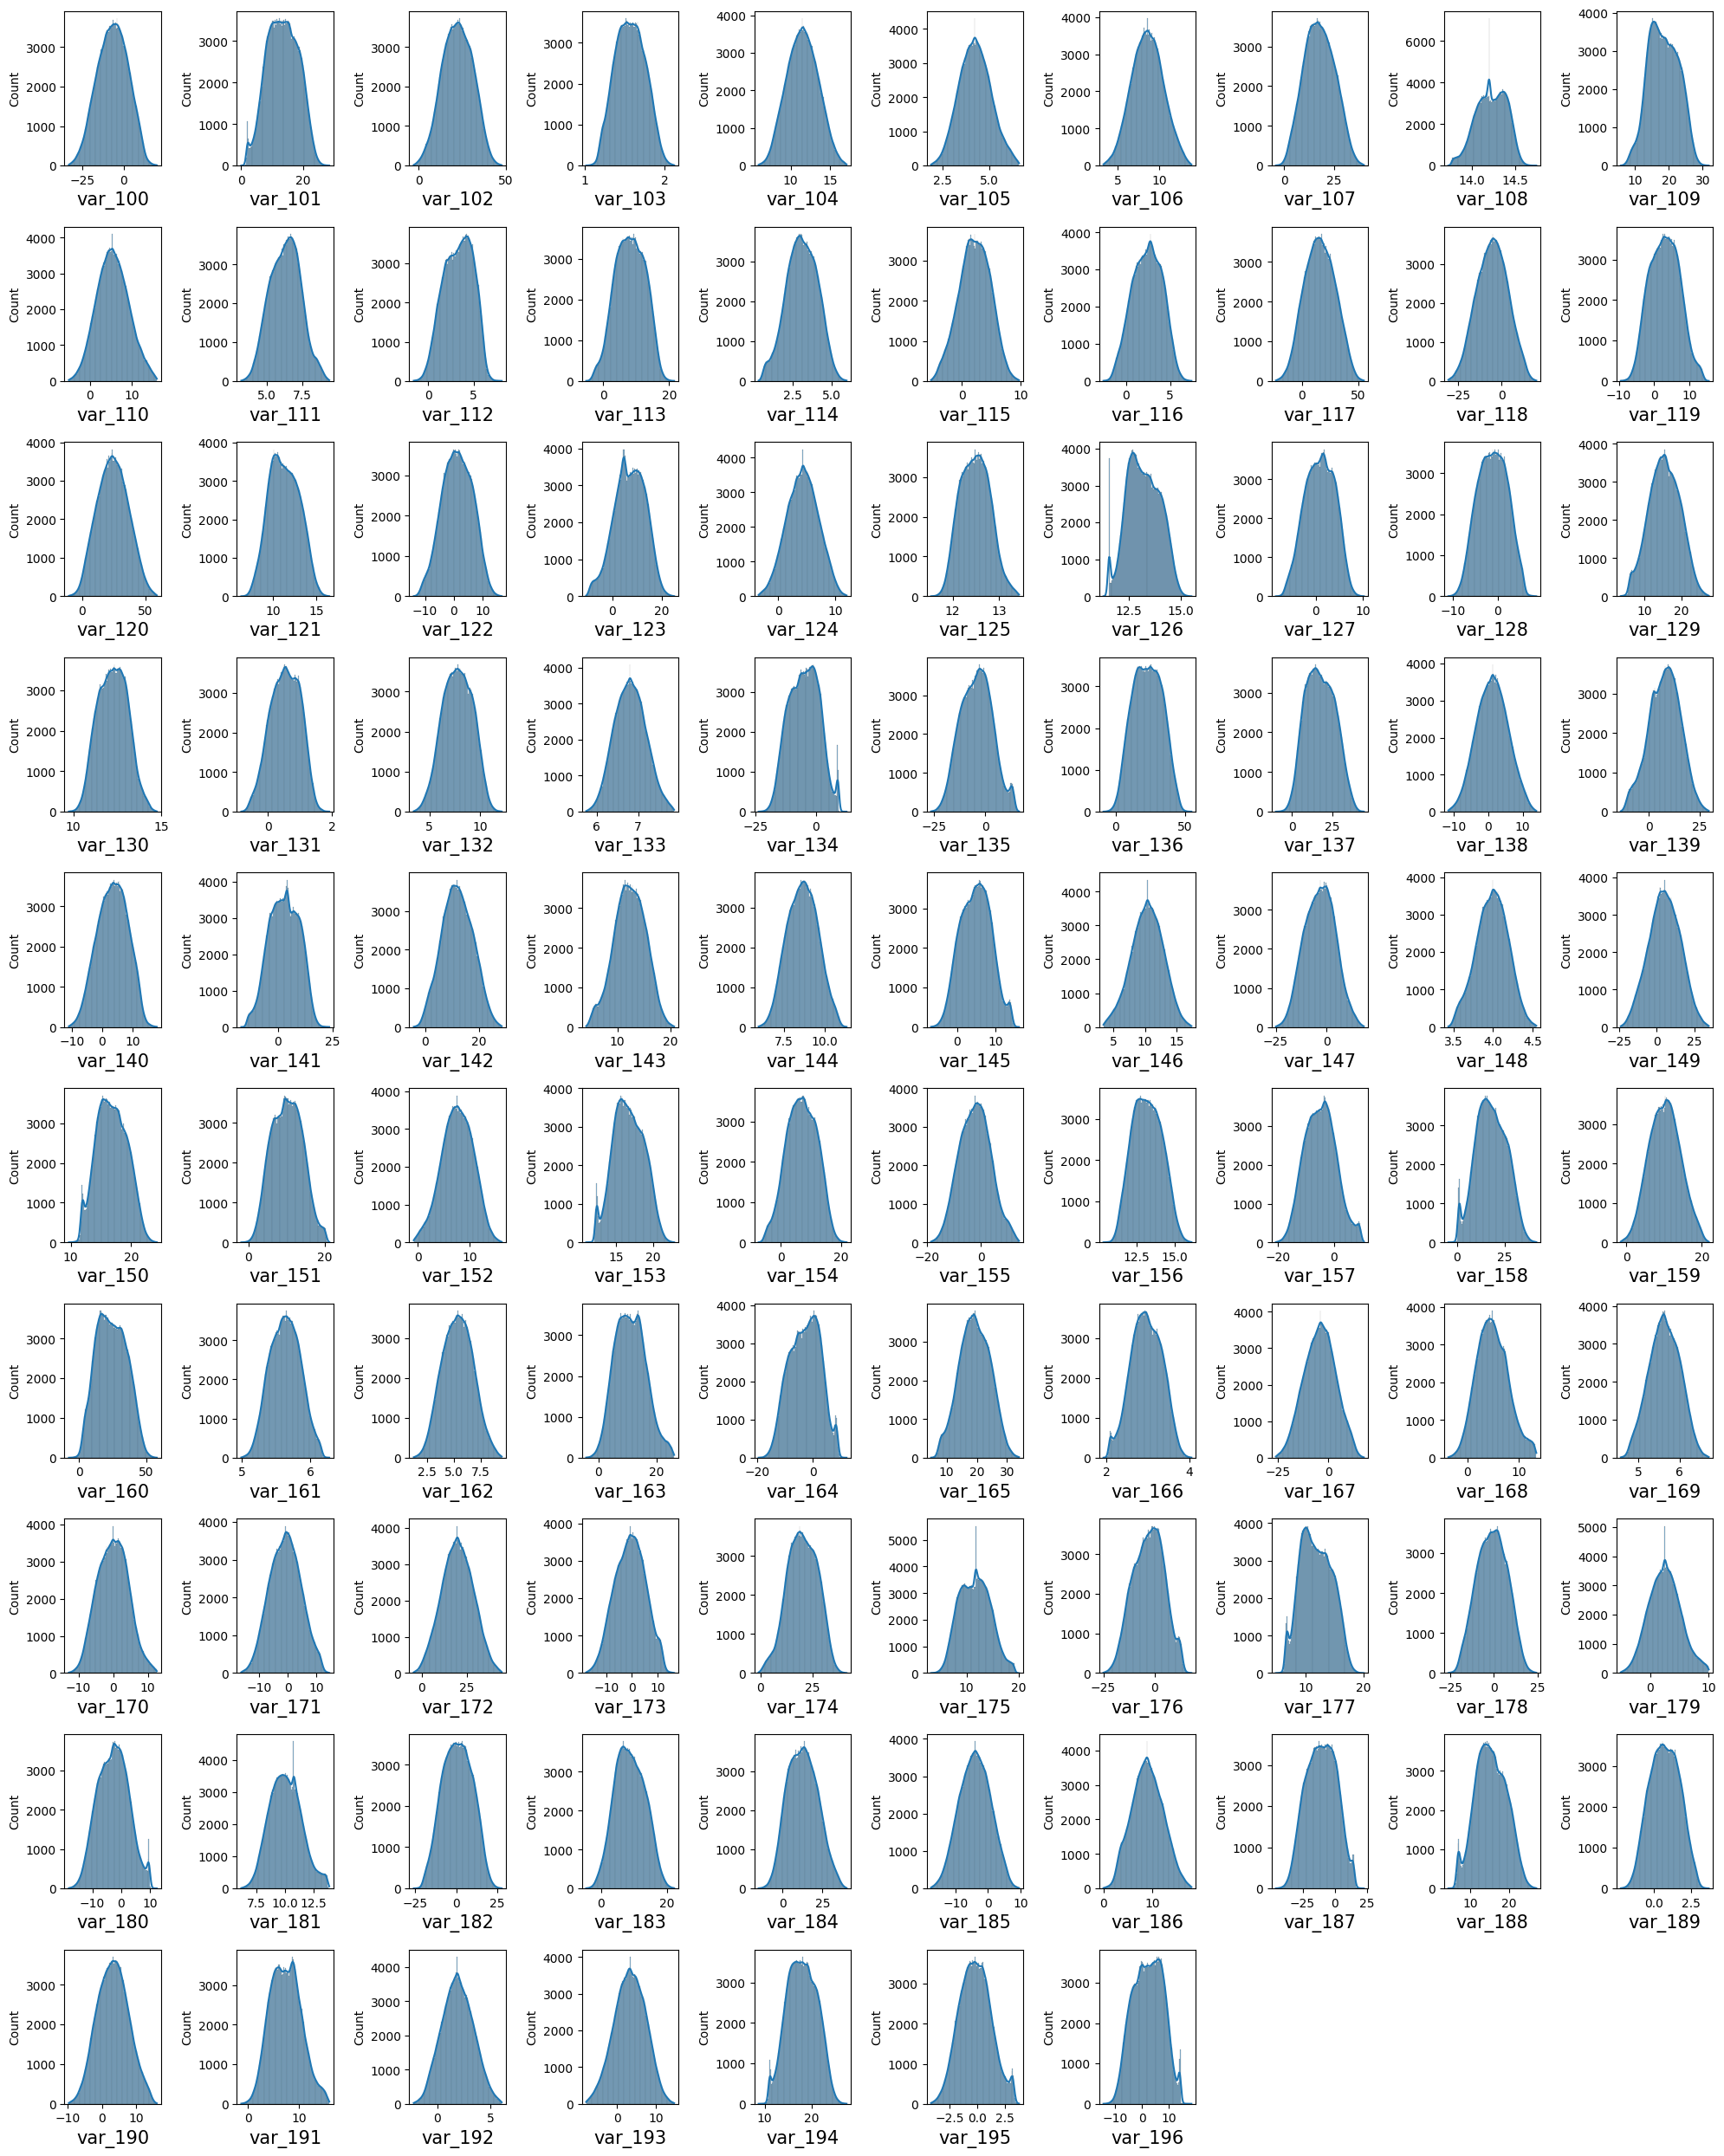

In [ ]:
dist = data.iloc[:,102:199]
plt.figure(figsize=(20,25),facecolor='white')
plotno = 1
for column in dist:
    if plotno<=100:
        plt.subplot(10,10,plotno)
        sns.histplot(dist[column],kde=True)
        plt.xlabel(column,fontsize=15)
    plotno+=1
plt.tight_layout()
plt.show()

### OBSERVATION:
We could see the distribution plots,

✅Most of the plots follow the normal distribution

✅some of them are very close to normal distribution

✅Hence,it's not necessary to use feature transformation techniques

<h2 style="color:white; font-size:30px;font-weight:bold;">
    Feature Engineering
</h2>


In [ ]:
#Drop unique and constant features
data.drop(columns=['ID_code'],inplace=True)

In [ ]:
# Inspect useless features
data.nunique().sort_values(ascending=False)

var_45     169929
var_117    164363
var_74     160764
var_61     159314
var_97     158732
var_120    158028
var_90     157202
var_187    157029
var_136    156614
var_160    156272
var_47     154779
var_70     153187
var_48     151948
var_100    150552
var_199    149413
var_182    149190
var_149    148146
var_96     148093
var_102    146151
var_30     145966
var_178    145193
var_184    145142
var_82     144828
var_54     144741
var_158    144540
var_137    144397
var_83     144276
var_19     144179
var_118    143448
var_51     143415
var_172    142989
var_73     142561
var_176    142483
var_40     141834
var_5      141026
var_135    140747
var_167    140683
var_49     140635
var_86     140447
var_21     139806
var_18     139507
var_76     139099
var_107    137743
var_17     137603
var_147    137461
var_139    137119
var_67     136814
var_80     136411
var_174    134913
var_141    134443
var_84     133729
var_41     131896
var_134    131619
var_11     129898
var_123    129871
var_75     129372
var_10     128640
var_142    128468
var_55     128077
var_173    127999
var_20     127764
var_155    127232
var_26     126912
var_44     126576
var_157    126498
var_171    125761
var_196    125560
var_87     125169
var_180    123445
var_163    123029
var_164    122743
var_101    122295
var_35     122198
var_122    121744
var_140    121257
var_52     120976
var_185    120518
var_154    119337
var_165    119336
var_183    117506
var_138    117113
var_113    116496
var_13     115181
var_38     114866
var_190    114801
var_60     113759
var_58     113525
var_170    113334
var_129    113330
var_159    112658
var_39     112518
var_119    112400
var_33     112235
var_109    112172
var_92     110704
var_69     110331
var_193    110113
var_72     109991
var_151    109666
var_1      108927
var_188    108791
var_145    108513
var_85     108434
var_65     108103
var_77     106809
var_110    105682
var_24     105099
var_89     103443
var_7      103044
var_56     102812
var_8       98615
var_128     98186
var_186     97637
var_194     97068
var_168     96950
var_63      96919
var_36      96235
var_127     95708
var_152     95497
var_0       94576
var_143     94267
var_191     94190
var_198     94065
var_46      93190
var_175     92657
var_124     90536
var_22      90400
var_94      89146
var_179     88691
var_29      88197
var_16      86851
var_115     86565
var_2       86509
var_32      85963
var_177     85718
var_88      84888
var_150     83646
var_146     83570
var_14      79120
var_37      79040
var_81      78907
var_31      76792
var_3       74575
var_62      74358
var_153     73725
var_104     72320
var_78      72253
var_106     70679
var_99      69219
var_121     64682
var_116     63452
var_4       63444
var_112     60469
var_27      60182
var_64      59353
var_192     58401
var_132     57885
var_195     57741
var_162     57250
var_181     56101
var_79      53212
var_9       49417
var_66      47578
var_111     46387
var_114     43036
var_189     41750
var_156     40607
var_144     40539
var_197     40487
var_105     38582
var_6       38490
var_59      37693
var_130     36625
var_28      35673
var_57      35405
var_53      33435
var_98      33101
var_126     32411
var_50      32092
var_42      31560
var_95      29235
var_93      25962
var_34      25155
var_23      24831
var_131     21458
var_15      19790
var_133     18738
var_169     18131
var_166     17874
var_125     15893
var_43      15171
var_25      14645
var_71      13483
var_161     11037
var_148     10376
var_12       9526
var_103      9340
var_108      8525
var_91       7940
var_68        402
target          2
dtype: int64

# Checking The Correlation

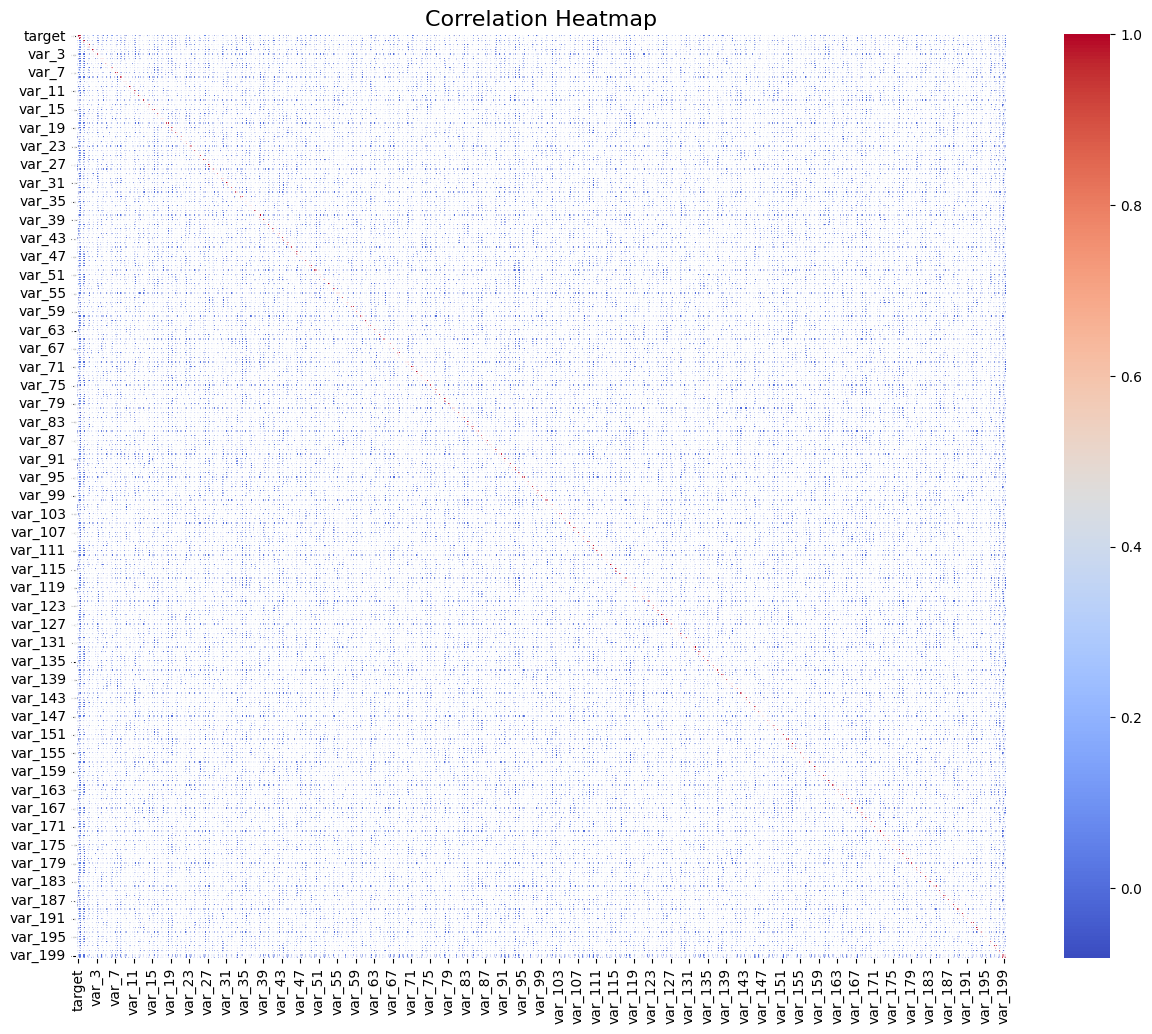

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={'size': 8})
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Insights
Most of the features ain't correlated with the target we gotta do PRINCIPAL COMPONENT ANALYSIS

# Feature scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
x = data.drop('target', axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of the resulting sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (160000, 200) (160000,)
Testing set shape: (40000, 200) (40000,)


# Scaling
Since most of your features are normally distributed, the best scaler to use is StandardScaler.

1️⃣ StandardScaler transforms data to have mean = 0 and standard deviation = 1 (Z-score normalization).

2️⃣This ensures that all features are on the same scale while preserving the Gaussian distribution.

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


## Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

## Logistic Regression

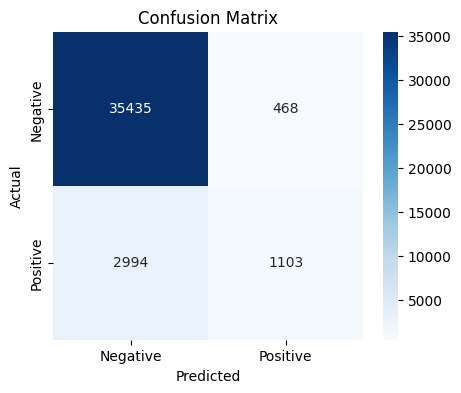

Logistic Regression Evaluation
Accuracy: 0.9134
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.70      0.27      0.39      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000



In [ ]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Evaluation
print("Logistic Regression Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


## LGBM Classifier

[LightGBM] [Info] Number of positive: 16001, number of negative: 143999
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.842947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100006 -> initscore=-2.197155
[LightGBM] [Info] Start training from score -2.197155


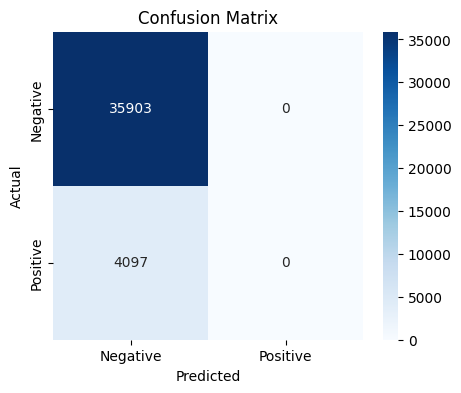

Accuracy: 0.8976
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.00      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000



In [ ]:
lgb_model=lgb.LGBMClassifier(n_estimators=100,learning_rate=0.01,random_state=42)
lgb_model.fit(x_train,y_train)

y_pred=lgb_model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

## Random Forest Classifier

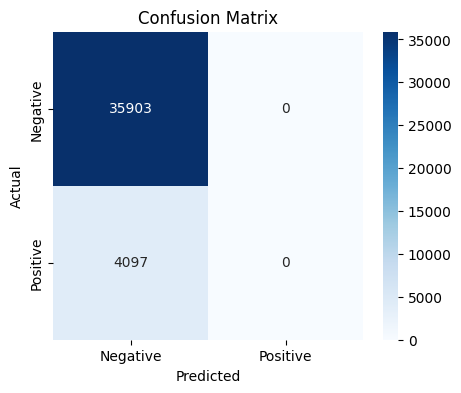

Random Forest Evaluation
Accuracy: 0.8976
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.00      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000



In [ ]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Evaluation
print("Random Forest Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

## XGB Classifier

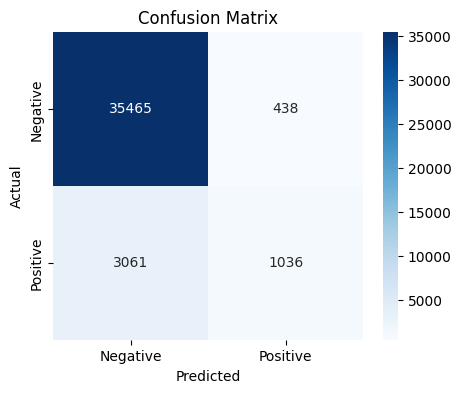

XGBoost Evaluation
Accuracy: 0.9125
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.70      0.25      0.37      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.62      0.66     40000
weighted avg       0.90      0.91      0.89     40000



In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(x_train, y_train)

# Predictions
y_pred = xgb_model.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Evaluation
print("XGBoost Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


## Cat Boost Classifier

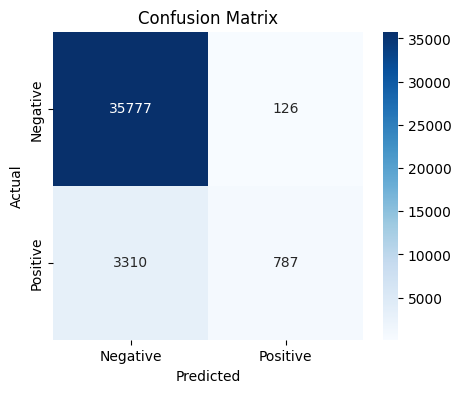

CatBoost Evaluation
Accuracy: 0.9141
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     35903
           1       0.86      0.19      0.31      4097

    accuracy                           0.91     40000
   macro avg       0.89      0.59      0.63     40000
weighted avg       0.91      0.91      0.89     40000



In [ ]:
cat_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=10, verbose=0, random_state=42)
cat_model.fit(x_train, y_train)
y_pred = cat_model.predict(x_test)

conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluation
print("CatBoost Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is used to reduce dimensionality while preserving as much variance as possible.

Key Reasons to Use PCA in Machine Learning:

1️⃣ Reduce Overfitting

Too many features (high dimensionality) can lead to overfitting.
PCA helps remove redundant or less important features while keeping the most useful ones.

2️⃣ Improve Model Performance & Training Speed

Fewer features mean faster training and less computational cost.
It removes noise and redundancy, improving generalization.

3️⃣ Handle Multicollinearity

If features are highly correlated, PCA transforms them into uncorrelated principal components, making models more stable.

In [ ]:
pca = PCA(n_components=0.90)
x_train = pca.fit_transform(x_train)
x_test= pca.transform(x_test)

In [ ]:
# Print the shapes of the resulting sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (160000, 179) (160000,)
Testing set shape: (40000, 179) (40000,)


# Model Building

# Logistic Regression

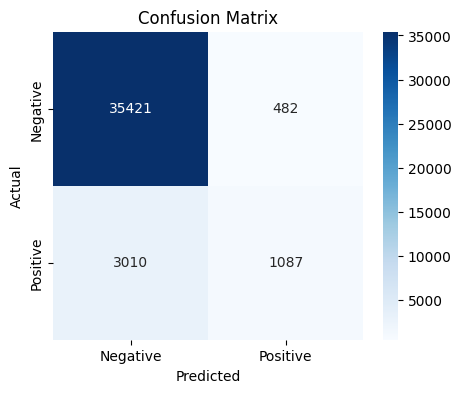

Logistic Regression Evaluation
Accuracy: 0.9127
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.69      0.27      0.38      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.91      0.89     40000



In [ ]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Evaluation
print("Logistic Regression Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


# LightGBM Classifier

[LightGBM] [Info] Number of positive: 16001, number of negative: 143999
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.339299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45645
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 179
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100006 -> initscore=-2.197155
[LightGBM] [Info] Start training from score -2.197155


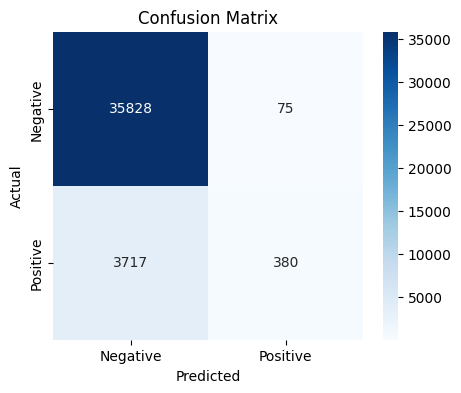

LGBMClassifier Evaluation
Accuracy: 0.9052
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     35903
           1       0.84      0.09      0.17      4097

    accuracy                           0.91     40000
   macro avg       0.87      0.55      0.56     40000
weighted avg       0.90      0.91      0.87     40000



In [ ]:
lgb_model=lgb.LGBMClassifier(n_estimators=100,learning_rate=0.01,random_state=42)
lgb_model.fit(x_train,y_train)

y_pred=lgb_model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("LGBMClassifier Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Random Forest Classifier

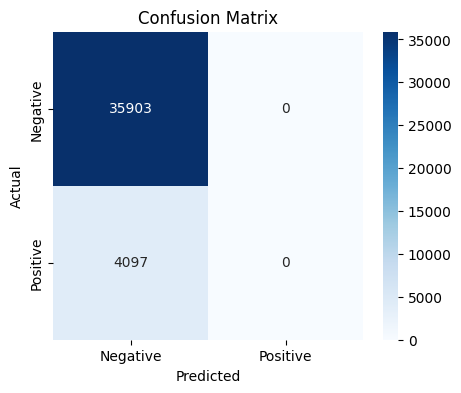

Random Forest Evaluation
Accuracy: 0.8976
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.00      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000



In [ ]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Evaluation
print("Random Forest Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# XGBoost Classifier

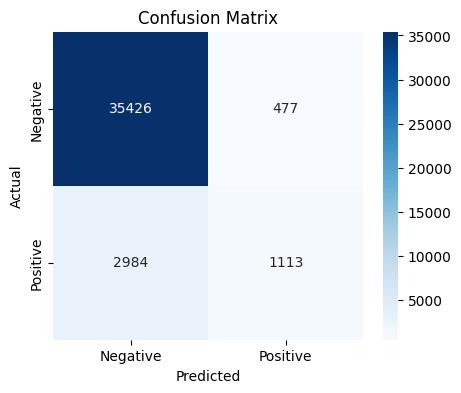

XGBoost Evaluation
Accuracy: 0.9135
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.70      0.27      0.39      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000



In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=42)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Evaluation
print("XGBoost Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# CatBoost Classifier

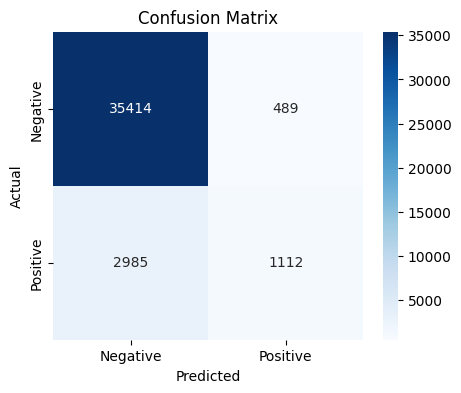

CatBoost Evaluation
Accuracy: 0.9132
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.69      0.27      0.39      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000



In [ ]:
cat_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=10, verbose=0, random_state=42)
cat_model.fit(x_train, y_train)
y_pred = cat_model.predict(x_test)

conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluation
print("CatBoost Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Graph of model comparision with PCA and without PCA

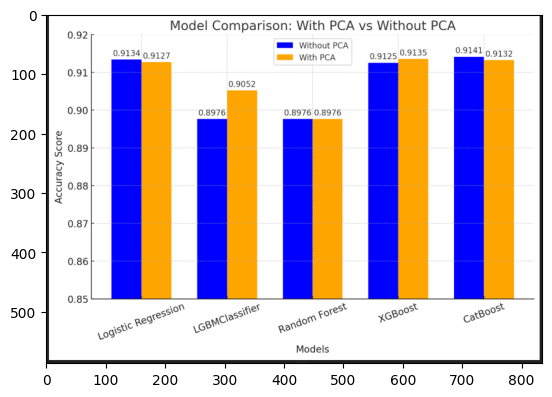

In [ ]:
img = cv2.imread('/content/drive/MyDrive/pca.PNG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


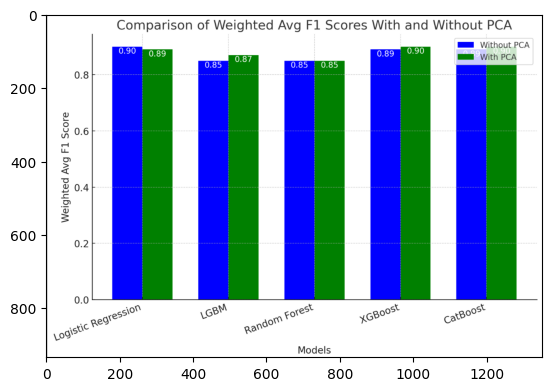

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Capture 2.PNG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

***Best model Without PCA***

✅ Best Model: CatBoost

Accuracy: 0.9141

Weighted F1-score: 0.89

Reason: Highest accuracy and best balance across classes.

***Best model With PCA***

✅ Best Model: XGBoost

Accuracy: 0.9135

Weighted F1-score: 0.90

## Synthetic Minority Over-sampling Technique
SMOTE (Synthetic Minority Over-sampling Technique) is a method to handle class imbalance by generating synthetic samples for the minority class.

In [ ]:

# Check class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))


smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution before SMOTE: Counter({0: 143999, 1: 16001})
Class distribution after SMOTE: Counter({0: 143999, 1: 143999})


### Logistic Regression

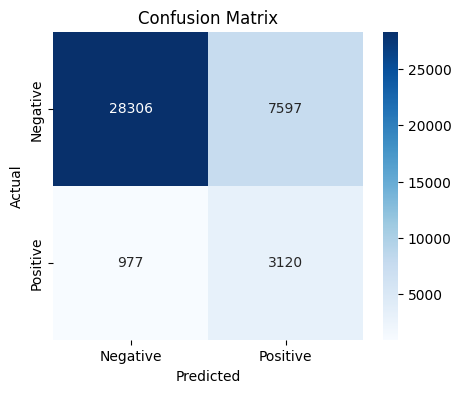

Logistic Regression Evaluation
Accuracy: 0.7856
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     35903
           1       0.29      0.76      0.42      4097

    accuracy                           0.79     40000
   macro avg       0.63      0.77      0.64     40000
weighted avg       0.90      0.79      0.82     40000



In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_smote, y_train_smote)

# Predictions
y_pred = logistic_model.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Evaluation
print("Logistic Regression Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


## Random Forest

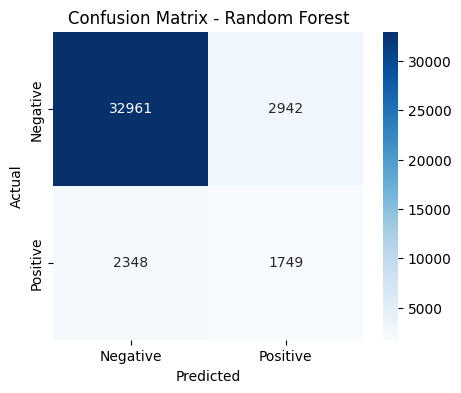

Random Forest Evaluation
Accuracy: 0.8678
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     35903
           1       0.37      0.43      0.40      4097

    accuracy                           0.87     40000
   macro avg       0.65      0.67      0.66     40000
weighted avg       0.88      0.87      0.87     40000



In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_smote, y_train_smote)

# Predictions
y_pred = rf_model.predict(x_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Evaluation Metrics
print("Random Forest Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


### LightGBM Classifier

[LightGBM] [Info] Number of positive: 143999, number of negative: 143999
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.627161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45645
[LightGBM] [Info] Number of data points in the train set: 287998, number of used features: 179
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


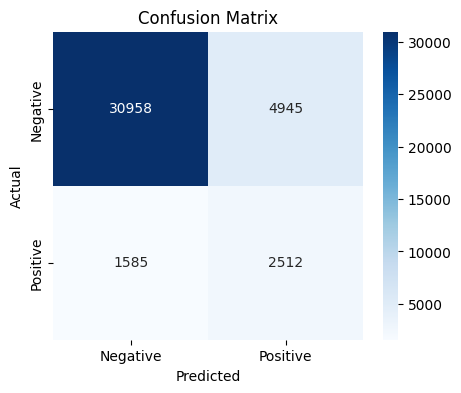

LGBMClassifier Evaluation
Accuracy: 0.8367
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     35903
           1       0.34      0.61      0.43      4097

    accuracy                           0.84     40000
   macro avg       0.64      0.74      0.67     40000
weighted avg       0.89      0.84      0.86     40000



In [ ]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(x_train_smote, y_train_smote)

# Predictions
y_pred = lgb_model.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Evaluation
print("LGBMClassifier Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

## XGBClassifier


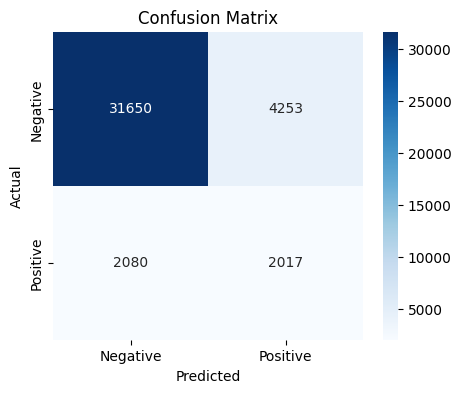

XGBClassifier Evaluation
Accuracy: 0.8417
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     35903
           1       0.32      0.49      0.39      4097

    accuracy                           0.84     40000
   macro avg       0.63      0.69      0.65     40000
weighted avg       0.88      0.84      0.86     40000



In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(x_train_smote, y_train_smote)

# Predictions
y_pred = xgb_model.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Evaluation
print("XGBClassifier Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


## Cat Boost Classifier

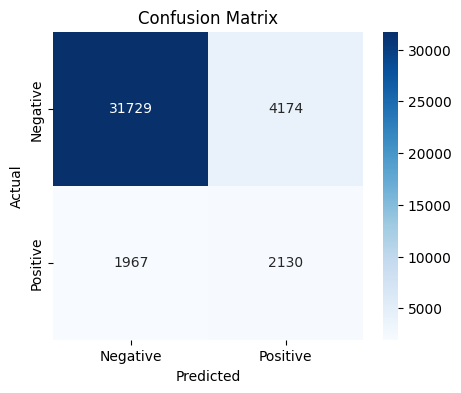

CatBoost Evaluation
Accuracy: 0.8465
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     35903
           1       0.34      0.52      0.41      4097

    accuracy                           0.85     40000
   macro avg       0.64      0.70      0.66     40000
weighted avg       0.88      0.85      0.86     40000



In [ ]:
cat_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=10, verbose=0, random_state=42)
cat_model.fit(x_train_smote, y_train_smote)
y_pred = cat_model.predict(x_test)

conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluation
print("CatBoost Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

## Downsampling for Imbalanced Data
Downsampling reduces the number of majority class samples to match the minority class, preventing the model from being biased toward the majority class.




In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Check class distribution before downsampling
print("Class distribution before downsampling:", Counter(y_train))

# Apply Random UnderSampling (Downsampling)
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_train_down, y_train_down = rus.fit_resample(x_train, y_train)

# Check class distribution after downsampling
print("Class distribution after downsampling:", Counter(y_train_down))


Class distribution before downsampling: Counter({0: 143999, 1: 16001})
Class distribution after downsampling: Counter({0: 16001, 1: 16001})


## Logistc Regression

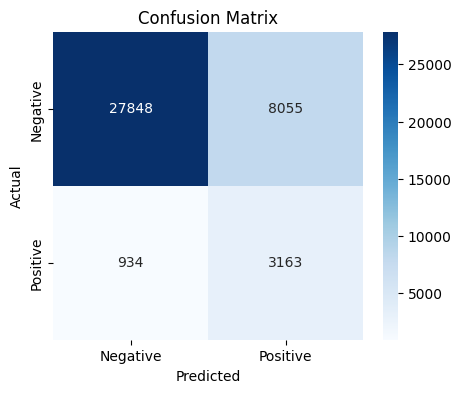

Logistic Regression Evaluation
Accuracy: 0.7753
              precision    recall  f1-score   support

           0       0.97      0.78      0.86     35903
           1       0.28      0.77      0.41      4097

    accuracy                           0.78     40000
   macro avg       0.62      0.77      0.64     40000
weighted avg       0.90      0.78      0.82     40000



In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_down, y_train_down)

# Predictions
y_pred = logistic_model.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Evaluation
print("Logistic Regression Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


## Random Forest

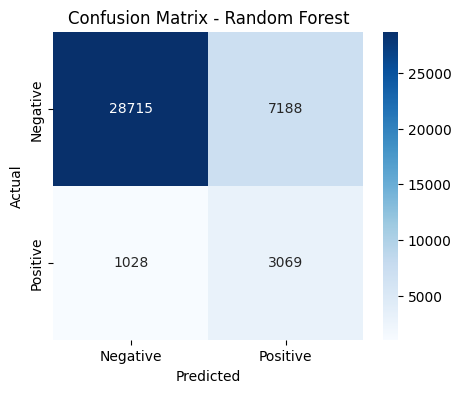

Random Forest Evaluation
Accuracy: 0.7946
              precision    recall  f1-score   support

           0       0.97      0.80      0.87     35903
           1       0.30      0.75      0.43      4097

    accuracy                           0.79     40000
   macro avg       0.63      0.77      0.65     40000
weighted avg       0.90      0.79      0.83     40000



In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_down, y_train_down)

y_pred = rf_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("Random Forest Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

## LGBM Classifier


[LightGBM] [Info] Number of positive: 16001, number of negative: 16001
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.117593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45645
[LightGBM] [Info] Number of data points in the train set: 32002, number of used features: 179
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


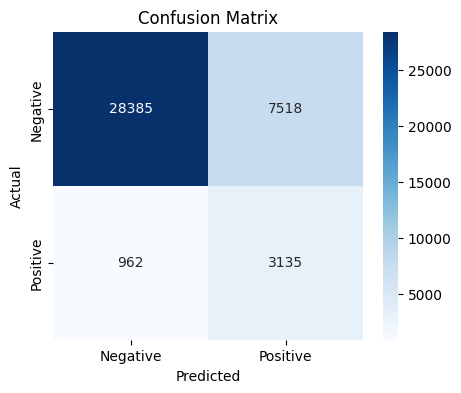

LGBMClassifier Evaluation
Accuracy: 0.7880
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     35903
           1       0.29      0.77      0.43      4097

    accuracy                           0.79     40000
   macro avg       0.63      0.78      0.65     40000
weighted avg       0.90      0.79      0.82     40000



In [ ]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(x_train_down, y_train_down)

# Predictions
y_pred = lgb_model.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Evaluation
print("LGBMClassifier Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

## XGB Classifier



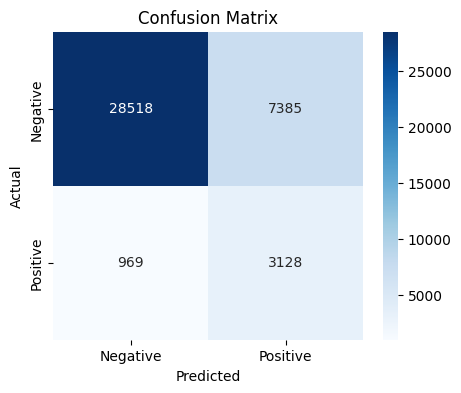

XGBoost Evaluation
Accuracy: 0.7912
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     35903
           1       0.30      0.76      0.43      4097

    accuracy                           0.79     40000
   macro avg       0.63      0.78      0.65     40000
weighted avg       0.90      0.79      0.83     40000



In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=42)
xgb_model.fit(x_train_down, y_train_down)
y_pred = xgb_model.predict(x_test)

conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Evaluation
print("XGBoost Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Cat Boost Classifier

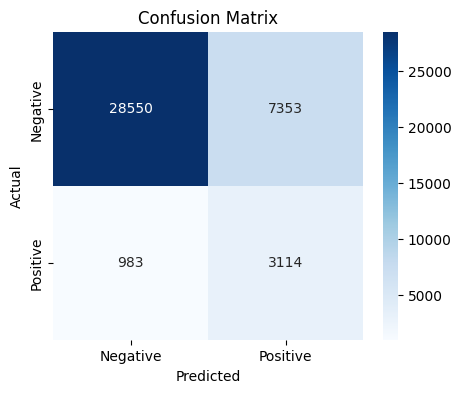

CatBoost Evaluation
Accuracy: 0.7916
              precision    recall  f1-score   support

           0       0.97      0.80      0.87     35903
           1       0.30      0.76      0.43      4097

    accuracy                           0.79     40000
   macro avg       0.63      0.78      0.65     40000
weighted avg       0.90      0.79      0.83     40000



In [ ]:
cat_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=10, verbose=0, random_state=42)
cat_model.fit(x_train_down, y_train_down)
y_pred = cat_model.predict(x_test)

conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluation
print("CatBoost Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

## Graph of model comparision with smote and downsampling


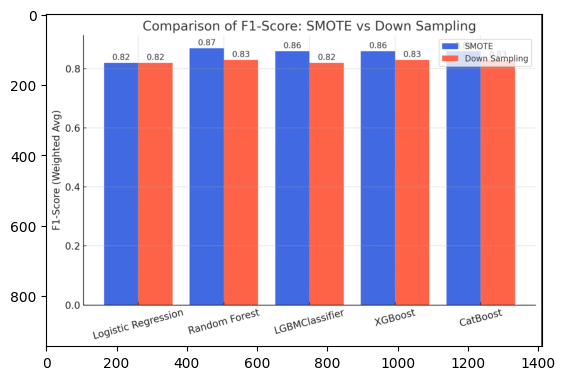

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/drive/MyDrive/smote f11.PNG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

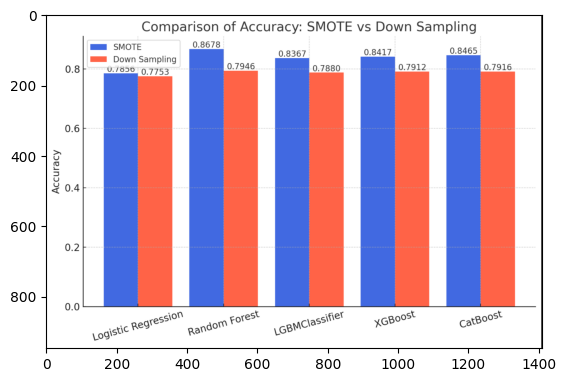

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/drive/MyDrive/smoteb acc.PNG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

***Best model With SMOTE (Oversampling)***

✅ Best Model: Random Forest

Accuracy: 0.8678

Weighted F1-score: 0.87


***Best model With Down Sampling***

✅ Best Models: Random Forest & CatBoost

Accuracy: ~0.79

Weighted F1-score: 0.83

## Challanges Faced Santander Customer Transaction Prediction

➤ ***High Dimensionality*** – The dataset contains 200 anonymous numerical features, making feature selection and model interpretability difficult

➤ ***Feature Anonymization*** – Since feature names and meanings are not provided, domain knowledge cannot be leveraged to improve model performance.

➤ ***Class Imbalance*** – The dataset has a skewed distribution of target labels, leading to models favoring the majority class and poor minority class detection.

➤ ***Metric Selection*** – Standard accuracy may not be sufficient due to class imbalance F1-score become more important.

➤ ***Hyperparameter Tuning Limitation*** – Due to the high computational cost, we did not perform extensive hyperparameter tuning as it took more than 3 hours to run.


### **Final Recommendation-Best accuracy:**

***CatBoost or XGBoost***-(PCA optional if we want to ensure data balance)

For handling imbalance: ***Random Forest (SMOTE)***

For Downsampling: ***XGBoost with PCA***